In [4]:
import tensorflow as tf
import pathlib

In [5]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)
flowers_root = pathlib.Path(flowers_root)

In [6]:
%ls $flowers_root

LICENSE.txt  daisy/  dandelion/  roses/  sunflowers/  tulips/


In [29]:
ds = tf.keras.preprocessing.image_dataset_from_directory(
    flowers_root,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="both",
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [30]:
train, valid = ds
train, valid

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [20]:
import matplotlib.pyplot as plt

def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(label)
  plt.axis('off')

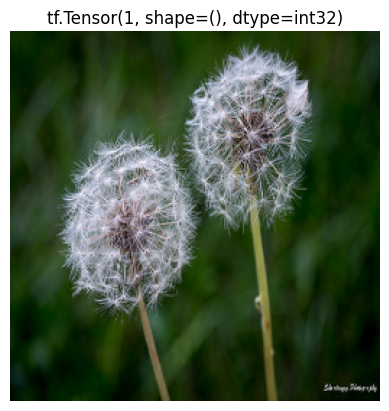

In [32]:
for img, label in train.take(1).unbatch():
    img = img / 255.0
    show(img, label)
    break